In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
s3_path = '/content/drive/MyDrive/with streamlit/Aggregated_Data.csv'
df = pd.read_csv(s3_path)
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20982154 entries, 0 to 20982153
Data columns (total 15 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   _id          object
 1   Dt           object
 2   Sta          int64 
 3   EqN          int64 
 4   Line         int64 
 5   Tag          int64 
 6   St           int64 
 7   hour         int64 
 8   day          int64 
 9   month        int64 
 10  year         int64 
 11  day_of_week  int64 
 12  is_weekend   int64 
 13  weekday      int64 
 14  Hour         object
dtypes: int64(12), object(3)
memory usage: 2.3+ GB
None


,_id,Dt,Sta,EqN,Line,Tag,St,hour,day,month,year,day_of_week,is_weekend,weekday,Hour
0,63b9225c1f70e5b6d8636750,2020-01-01 00:00:35+00:00,207,1200350,7,7001,1,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
1,63b9225c1f70e5b6d8636751,2020-01-01 00:00:35+00:00,207,1200350,7,7001,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
2,63b9225c1f70e5b6d8636768,2020-01-01 00:00:37+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
3,63b9225c1f70e5b6d8636769,2020-01-01 00:00:39+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
4,63b9225c1f70e5b6d863676a,2020-01-01 00:00:53+00:00,207,282875,7,22005,1,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00


In [8]:
# Basic statistical analysis
df.describe()


,Sta,EqN,Line,Tag,St,hour,day,month,year,day_of_week,is_weekend,weekday
count,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07,2.098215e+07
mean,2.065264e+02,3.805496e+05,7.000007e+00,1.086814e+04,6.211572e-01,1.250731e+01,1.462902e+01,5.923622e+00,2.021526e+03,2.971510e+00,2.775056e-01,2.971510e+00
std,5.059593e-01,3.205597e+05,2.682637e-03,6.293936e+03,5.654182e+00,6.424062e+00,8.815906e+00,3.130539e+00,9.183403e-01,1.980921e+00,4.477681e-01,1.980921e+00
min,1.760000e+02,1.516730e+05,7.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.060000e+02,2.827590e+05,7.000000e+00,5.043000e+03,0.000000e+00,8.000000e+00,7.000000e+00,4.000000e+00,2.021000e+03,1.000000e+00,0.000000e+00,1.000000e+00
50%,2.070000e+02,2.828480e+05,7.000000e+00,1.103600e+04,0.000000e+00,1.300000e+01,1.400000e+01,6.000000e+00,2.021000e+03,3.000000e+00,0.000000e+00,3.000000e+00
75%,2.070000e+02,2.828660e+05,7.000000e+00,1.103600e+04,0.000000e+00,1.800000e+01,2.200000e+01,8.000000e+00,2.022000e+03,5.000000e+00,1.000000e+00,5.000000e+00
max,2.070000e+02,1.200350e+06,8.000000e+00,3.100100e+04,9.800000e+01,2.300000e+01,3.100000e+01,1.200000e+01,2.023000e+03,6.000000e+00,1.000000e+00,6.000000e+00


In [9]:
# Check for missing values
df.isnull().sum()

# # Optionally, drop or fill missing values
# df = df.dropna()  # Drop rows with missing values
# # Alternatively, you can fill missing values with a method such as mean
# # df = df.fillna(df.mean())


,0
_id,0
Dt,0
Sta,0
EqN,0
Line,0
Tag,0
St,0
hour,0
day,0
month,0


In [10]:
import pandas as pd
# Ensure 'Dt' is in datetime format with timezone handling
df['Dt'] = pd.to_datetime(df['Dt'], utc=True, errors='coerce')

# Now you can extract the desired components
df['hour'] = df['Dt'].dt.hour
df['day'] = df['Dt'].dt.day
df['month'] = df['Dt'].dt.month
df['year'] = df['Dt'].dt.year
df['day_of_week'] = df['Dt'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Grouping and analyzing traffic data
print(df.groupby('hour').size())  # Hourly traffic
print(df.groupby('day').size())   # Daily traffic
print(df.groupby('month').size()) # Monthly traffic


hour
0      638030
1      620744
2      728226
3      684949
4      589086
5      570340
6      581825
7      653294
8      782596
9      929979
10     924389
11     922671
12    1021521
13    1064929
14    1119760
15    1195445
16    1168360
17    1292375
18    1293951
19    1083687
20     902582
21     744830
22     724205
23     744380
dtype: int64
day
1      806702
2      811905
3      830025
4      748397
5      751428
6      785719
7      793232
8     1121790
9      830297
10     728160
11     733535
12     683035
13     667992
14     646105
15     617198
16     660531
17     642042
18     624104
19     629761
20     587080
21     617098
22     616145
23     635029
24     570182
25     577336
26     571782
27     648012
28     599074
29     559609
30     552737
31     336112
dtype: int64
month
1     2385297
2     1720373
3     1014718
4     1705557
5     2335973
6     2550214
7     2918777
8     1806552
9     1764535
10     900238
11     709315
12    1170605
dtype: int64


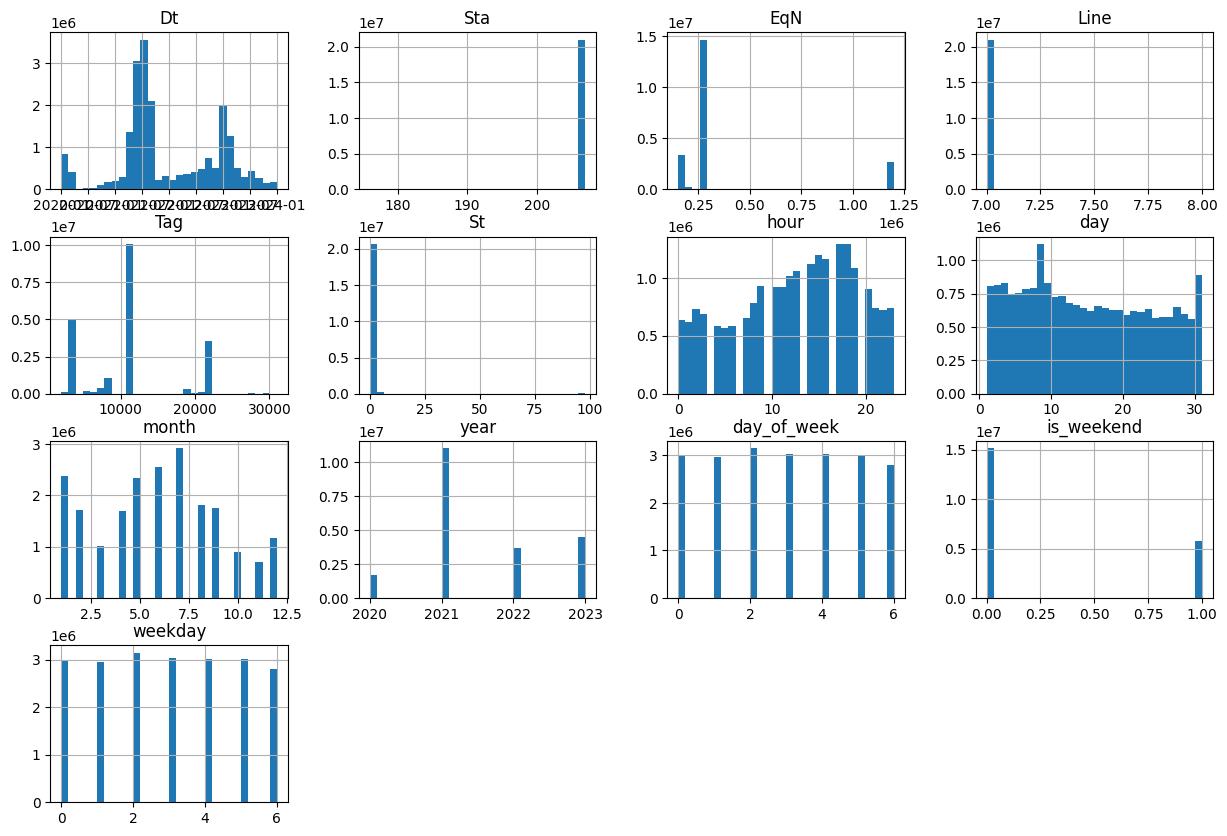

ValueError: could not convert string to float: '63b9225c1f70e5b6d8636750'

<Figure size 1000x800 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of each numeric feature
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Correlation heatmap to understand feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [ ]:

print(df.columns)

In [ ]:
df.groupby('hour')[['_id', 'Tag']].count().plot(kind='bar')


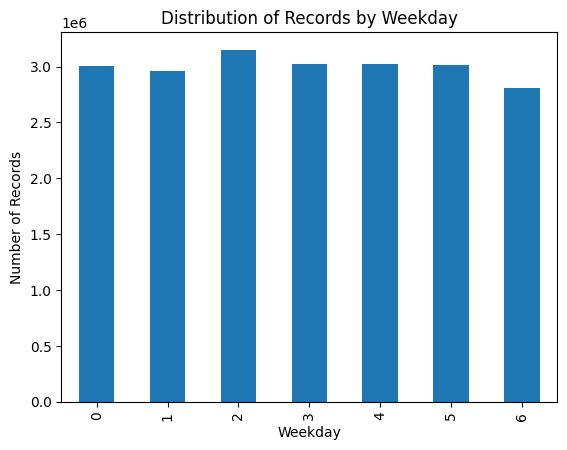

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and has a 'Dt' column
df['weekday'] = df['Dt'].dt.weekday  # Create the 'weekday' column

# Now you can group and plot
ax = df.groupby('weekday').size().plot(kind='bar')
ax.set_ylabel('Number of Records')
ax.set_xlabel('Weekday')
ax.set_title('Distribution of Records by Weekday')
plt.show()


<Axes: xlabel='Sta'>

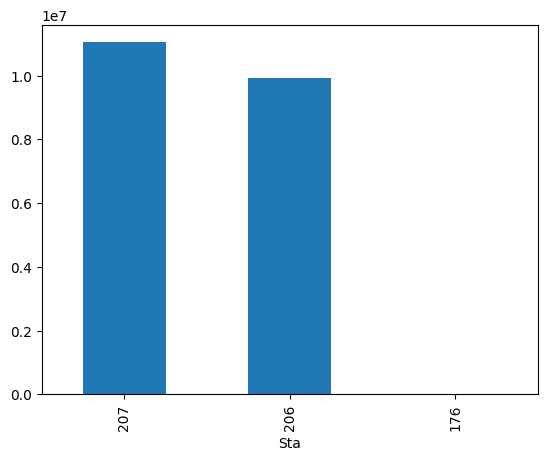

In [13]:
df.groupby('Sta')['_id'].count().sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='EqN'>

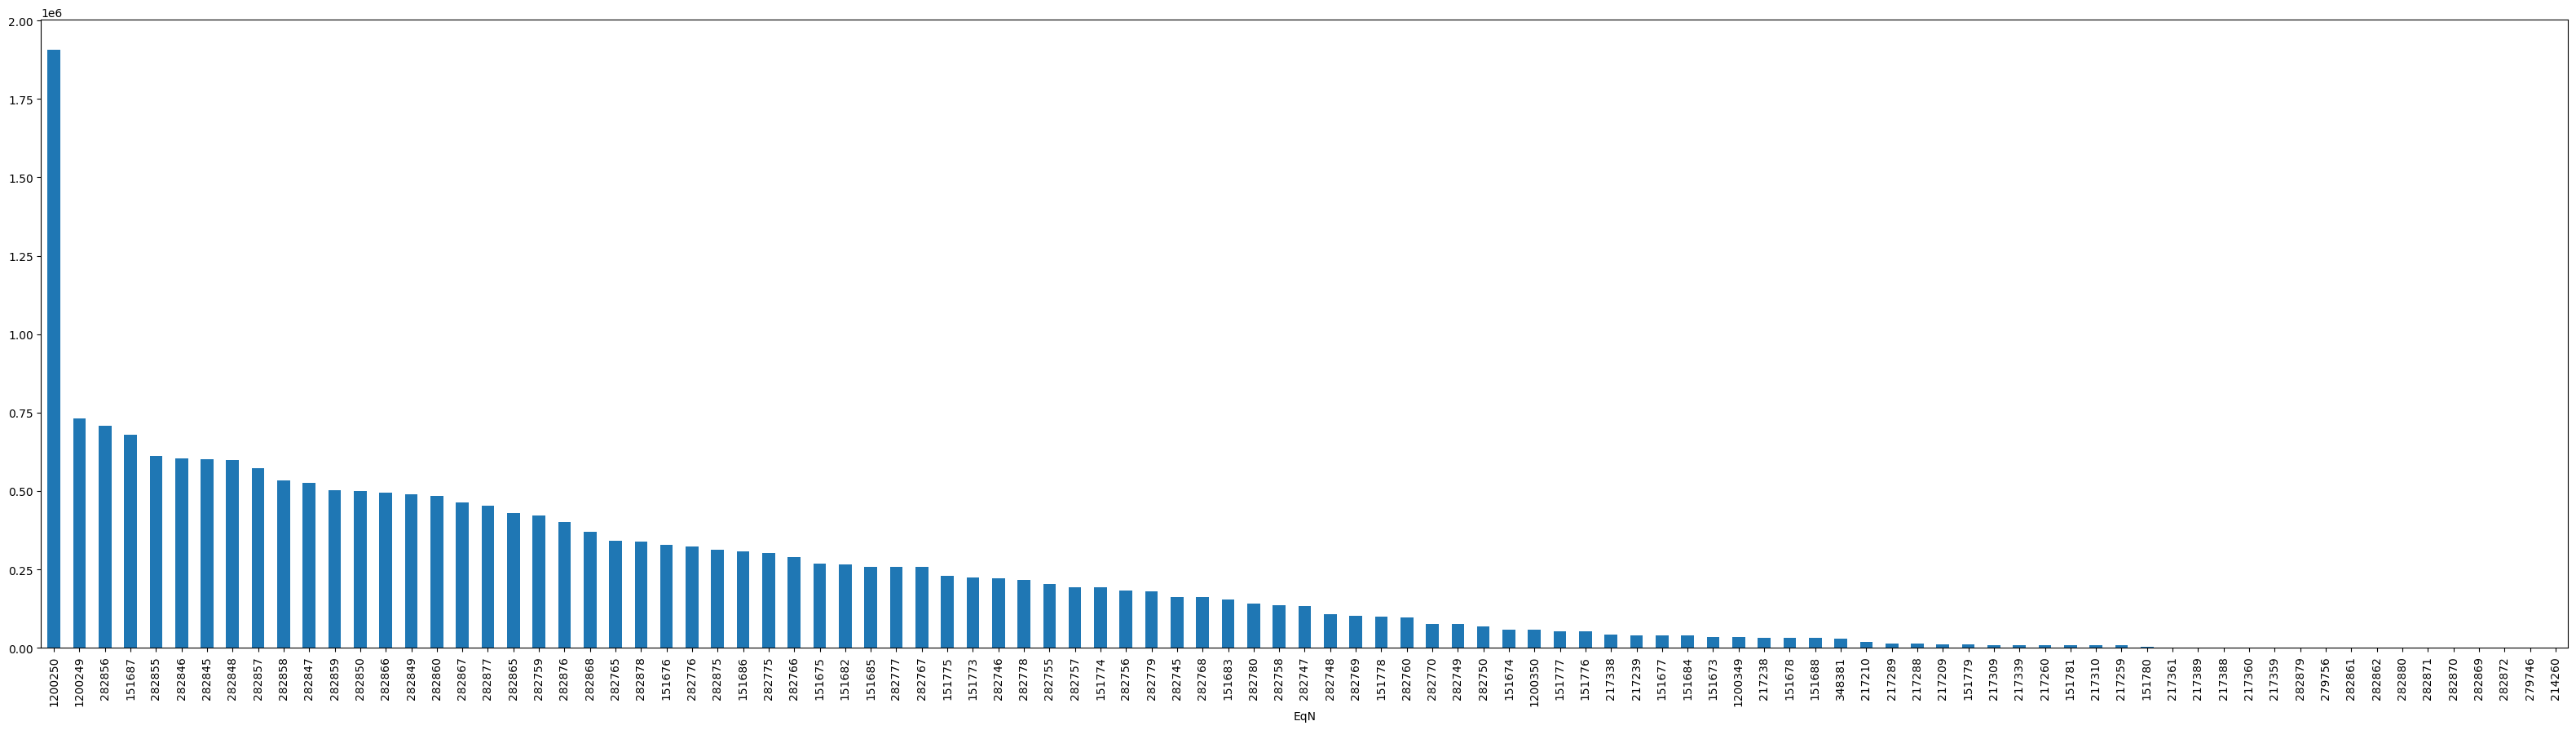

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
df.groupby('EqN')['_id'].count().sort_values(ascending=False).plot(kind='bar', rot=90)


In [15]:

print(df.columns)

Index(['_id', 'Dt', 'Sta', 'EqN', 'Line', 'Tag', 'St', 'hour', 'day', 'month',
       'year', 'day_of_week', 'is_weekend', 'weekday', 'Hour'],
      dtype='object')


In [16]:
df.pivot_table(index='Sta', columns='hour', values='_id', aggfunc='count')


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Sta,,,,,,,,,,,,,,,,,,,,,
176,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,23.0,NaN,...,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
206,265262.0,238709.0,317658.0,290199.0,220164.0,206801.0,221475.0,282177.0,391273.0,525827.0,...,529715.0,579080.0,547845.0,686366.0,710211.0,547272.0,405429.0,307787.0,291733.0,347675.0
207,372768.0,382028.0,410565.0,394750.0,368922.0,363539.0,360350.0,371117.0,391300.0,404152.0,...,590045.0,616365.0,620514.0,606005.0,583740.0,536415.0,497153.0,437043.0,432472.0,396705.0


In [17]:
df.pivot_table(index='EqN', columns='hour', values='_id', aggfunc='count')


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
EqN,,,,,,,,,,,,,,,,,,,,,
151673,543.0,595.0,2380.0,4529.0,1973.0,625.0,682.0,608.0,964.0,851.0,...,1645.0,1314.0,1253.0,1108.0,1702.0,1999.0,2199.0,636.0,865.0,551.0
151674,544.0,1004.0,2528.0,4057.0,2045.0,1660.0,1583.0,1101.0,1678.0,1870.0,...,3433.0,2938.0,2858.0,3602.0,3299.0,2992.0,2989.0,2121.0,2018.0,1136.0
151675,609.0,1165.0,2486.0,3559.0,1566.0,3114.0,4102.0,5288.0,9791.0,10835.0,...,19853.0,20957.0,20030.0,23780.0,23258.0,15072.0,12992.0,5978.0,5861.0,3355.0
151676,1114.0,1683.0,2733.0,4176.0,1631.0,2533.0,3664.0,5078.0,11939.0,14746.0,...,22197.0,26183.0,27419.0,35542.0,32170.0,19088.0,14279.0,7368.0,7747.0,3691.0
151677,1387.0,1323.0,2673.0,4031.0,2033.0,1169.0,1857.0,1473.0,1675.0,1244.0,...,1922.0,1684.0,1745.0,1532.0,1629.0,1255.0,1412.0,1347.0,1813.0,1560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348381,632.0,448.0,841.0,2668.0,1025.0,766.0,410.0,337.0,496.0,458.0,...,1378.0,1493.0,1403.0,1419.0,1186.0,1456.0,1860.0,1276.0,2096.0,2323.0
1200249,31875.0,27978.0,26218.0,29363.0,25170.0,26626.0,29260.0,33212.0,33038.0,31315.0,...,26516.0,26434.0,28326.0,30363.0,32174.0,31078.0,35843.0,36270.0,33579.0,31363.0
1200250,79861.0,76304.0,75099.0,76431.0,74480.0,72852.0,74802.0,73894.0,73903.0,74773.0,...,83226.0,85959.0,87697.0,88009.0,87668.0,83723.0,80564.0,81358.0,80234.0,79639.0


In [18]:
df_filtered = df[df['Sta'] != 176]


In [19]:
df.pivot_table(index='EqN', columns='hour', values='_id', aggfunc='count')


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
EqN,,,,,,,,,,,,,,,,,,,,,
151673,543.0,595.0,2380.0,4529.0,1973.0,625.0,682.0,608.0,964.0,851.0,...,1645.0,1314.0,1253.0,1108.0,1702.0,1999.0,2199.0,636.0,865.0,551.0
151674,544.0,1004.0,2528.0,4057.0,2045.0,1660.0,1583.0,1101.0,1678.0,1870.0,...,3433.0,2938.0,2858.0,3602.0,3299.0,2992.0,2989.0,2121.0,2018.0,1136.0
151675,609.0,1165.0,2486.0,3559.0,1566.0,3114.0,4102.0,5288.0,9791.0,10835.0,...,19853.0,20957.0,20030.0,23780.0,23258.0,15072.0,12992.0,5978.0,5861.0,3355.0
151676,1114.0,1683.0,2733.0,4176.0,1631.0,2533.0,3664.0,5078.0,11939.0,14746.0,...,22197.0,26183.0,27419.0,35542.0,32170.0,19088.0,14279.0,7368.0,7747.0,3691.0
151677,1387.0,1323.0,2673.0,4031.0,2033.0,1169.0,1857.0,1473.0,1675.0,1244.0,...,1922.0,1684.0,1745.0,1532.0,1629.0,1255.0,1412.0,1347.0,1813.0,1560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348381,632.0,448.0,841.0,2668.0,1025.0,766.0,410.0,337.0,496.0,458.0,...,1378.0,1493.0,1403.0,1419.0,1186.0,1456.0,1860.0,1276.0,2096.0,2323.0
1200249,31875.0,27978.0,26218.0,29363.0,25170.0,26626.0,29260.0,33212.0,33038.0,31315.0,...,26516.0,26434.0,28326.0,30363.0,32174.0,31078.0,35843.0,36270.0,33579.0,31363.0
1200250,79861.0,76304.0,75099.0,76431.0,74480.0,72852.0,74802.0,73894.0,73903.0,74773.0,...,83226.0,85959.0,87697.0,88009.0,87668.0,83723.0,80564.0,81358.0,80234.0,79639.0


In [20]:
# Count of NaN values in each column
print(df.isna().sum())


_id            0
Dt             0
Sta            0
EqN            0
Line           0
Tag            0
St             0
hour           0
day            0
month          0
year           0
day_of_week    0
is_weekend     0
weekday        0
Hour           0
dtype: int64


In [21]:
# Display rows with NaN values
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)


Empty DataFrame
Columns: [_id, Dt, Sta, EqN, Line, Tag, St, hour, day, month, year, day_of_week, is_weekend, weekday, Hour]
Index: []


In [22]:
df.head()

,_id,Dt,Sta,EqN,Line,Tag,St,hour,day,month,year,day_of_week,is_weekend,weekday,Hour
0,63b9225c1f70e5b6d8636750,2020-01-01 00:00:35+00:00,207,1200350,7,7001,1,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
1,63b9225c1f70e5b6d8636751,2020-01-01 00:00:35+00:00,207,1200350,7,7001,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
2,63b9225c1f70e5b6d8636768,2020-01-01 00:00:37+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
3,63b9225c1f70e5b6d8636769,2020-01-01 00:00:39+00:00,207,282875,7,22005,0,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00
4,63b9225c1f70e5b6d863676a,2020-01-01 00:00:53+00:00,207,282875,7,22005,1,0,1,1,2020,2,0,2,2020-01-01 00:00:00+00:00


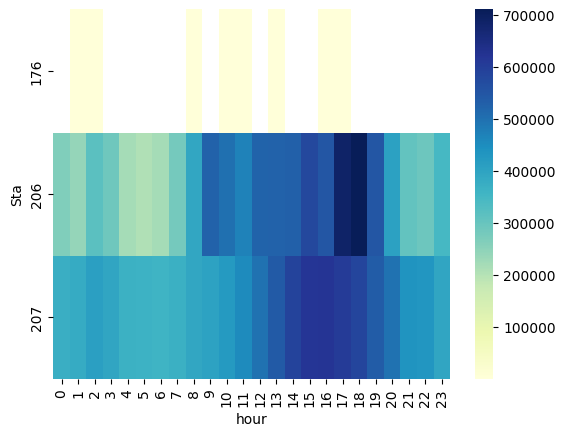

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Modify pivot table to include 'Tag'
heatmap_data = df.pivot_table(index=['Sta'], columns='hour', values='_id', aggfunc='count')

# Create the heatmap
sns.heatmap(heatmap_data, cmap="YlGnBu")

# Show the plot
plt.show()


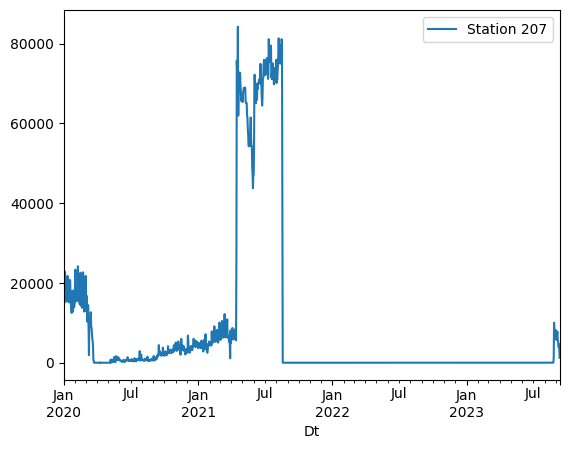

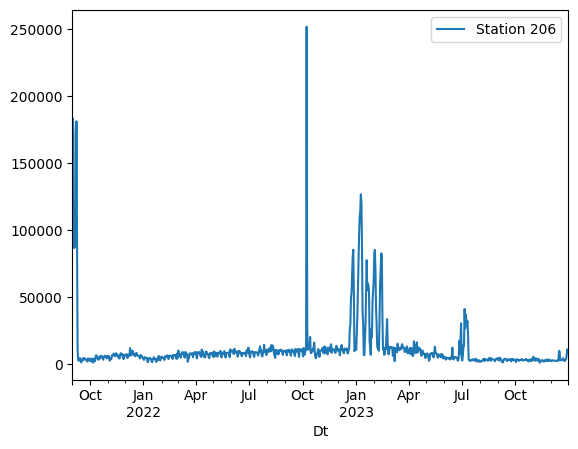

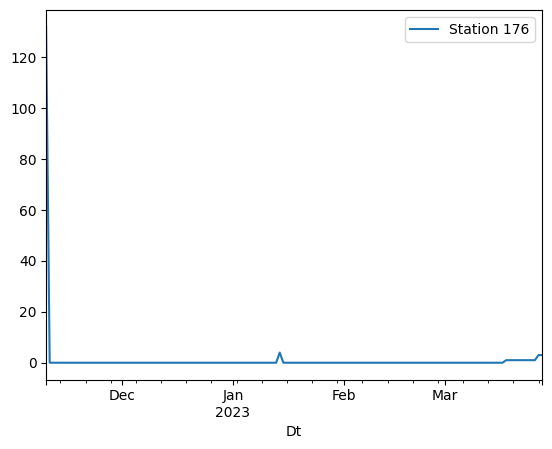

In [24]:
for station in df['Sta'].unique():
         df_station = df[df['Sta'] == station]
         df_station.set_index('Dt')['_id'].resample('D').count().plot(label=f'Station {station}')
         plt.legend()
         plt.show()


In [25]:
# Remove rows where the 'Sta' column has a value of 176
df_filtered = df[df['Sta'] != 176]

# Check the filtered DataFrame
print(df_filtered)


                               _id                        Dt  Sta      EqN  \
0         63b9225c1f70e5b6d8636750 2020-01-01 00:00:35+00:00  207  1200350   
1         63b9225c1f70e5b6d8636751 2020-01-01 00:00:35+00:00  207  1200350   
2         63b9225c1f70e5b6d8636768 2020-01-01 00:00:37+00:00  207   282875   
3         63b9225c1f70e5b6d8636769 2020-01-01 00:00:39+00:00  207   282875   
4         63b9225c1f70e5b6d863676a 2020-01-01 00:00:53+00:00  207   282875   
...                            ...                       ...  ...      ...   
20982149  6591c0b0a7fe43706789fb9c 2023-12-31 23:52:28+00:00  206   282776   
20982150  6591b35b1872153fcf86821f 2023-12-31 23:56:24+00:00  206   151682   
20982151  6591b35b1872153fcf868220 2023-12-31 23:56:24+00:00  206   151682   
20982152  6591b35b1872153fcf868221 2023-12-31 23:56:36+00:00  206   151682   
20982153  6591b35b1872153fcf868222 2023-12-31 23:56:36+00:00  206   151682   

          Line    Tag  St  hour  day  month  year  day_of_week 

MODEL TRAINING

In [ ]:
!pip install torch


In [ ]:
import boto3

In [ ]:
df.head()

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('Aggregated_Data.csv', index=False)

print("DataFrame saved as 'my_current_data.csv'")


In [ ]:
df.head()

# Segregated csv and missing Dates

In [ ]:
import os
import pandas as pd
from datetime import datetime, timedelta

def load_data(file_path):
    """Load data from a CSV file in chunks and parse the 'Dt' column as a datetime."""
    chunk_list = []  # List to hold the chunks of data
    required_columns = ['Dt', 'Sta']  # Specify only required columns

    # Read the CSV file in chunks
    for chunk in pd.read_csv(file_path, usecols=required_columns, chunksize=10000, low_memory=True):
        # Convert 'Dt' to datetime and ensure correct data type
        chunk['Dt'] = pd.to_datetime(chunk['Dt'], errors='coerce')
        chunk_list.append(chunk)
        print(chunk)
    # Concatenate all chunks into a single DataFrame if you want to keep all data
    df = pd.concat(chunk_list, ignore_index=True)
    return df

def filter_data(df, cutoff_date):
    """Filter the DataFrame to include only rows where 'Dt' is less than the cutoff date."""
    return df[df['Dt'] < cutoff_date]

def sort_data(df):
    """Sort the DataFrame by the 'Dt' column."""
    return df.sort_values(by='Dt')

def group_by_station(df):
    """Group the DataFrame by 'Sta' and count entries."""
    return df.groupby("Sta").size().reset_index(name='Count')

def save_station_csvs(station_counts, df_sorted):
    """Save individual CSV files for each station."""
    save_csvs = input("Do you want to save CSV files for each station? (yes/no): ").strip().lower()

    if save_csvs == 'yes':
        output_dir = r"/content/drive/MyDrive/with streamlit/station_csvs"
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        for sta in station_counts['Sta']:
            station_data = df_sorted[df_sorted['Sta'] == sta]
            count = station_counts[station_counts['Sta'] == sta]['Count'].values[0]
            file_name = f"{sta}_entries_{count}.csv"
            file_path = os.path.join(output_dir, file_name)
            station_data.to_csv(file_path, index=False)
            print(f"Saved CSV for station {sta} with {count} entries at {file_path}")

def find_missing_dates(df_sorted):
    """Find and return missing dates in the sorted DataFrame."""
    min_date = df_sorted['Dt'].min().date()
    max_date = df_sorted['Dt'].max().date()

    full_date_range = pd.date_range(min_date, max_date, freq='D')
    present_dates = df_sorted['Dt'].dt.date.unique()

    missing_dates = full_date_range[~full_date_range.isin(present_dates)]
    return missing_dates

def count_missing_days(missing_dates):
    """Count the number of missing days."""
    return len(missing_dates)

def find_missing_date_ranges(missing_dates):
    """Find and return ranges of consecutive missing dates."""
    missing_date_ranges = []
    missing_days_count = len(missing_dates)

    if missing_days_count > 0:
        start_date = missing_dates[0]
        end_date = missing_dates[0]

        for i in range(1, missing_days_count):
            if missing_dates[i] == missing_dates[i - 1] + timedelta(days=1):
                end_date = missing_dates[i]
            else:
                missing_date_ranges.append((start_date, end_date))
                start_date = missing_dates[i]
                end_date = missing_dates[i]

        # Append the last range
        missing_date_ranges.append((start_date, end_date))

    return missing_date_ranges

def process_time_series_data(file_path):
    """Process the time series data by calling other functions."""
    # Get today's date and cutoff date (one day before today) as a datetime object
    today = datetime.now()
    today = pd.Timestamp(today).tz_localize('UTC')
    cutoff_date = today - timedelta(days=1)

    df = load_data(file_path)
    df_filtered = filter_data(df, cutoff_date)
    df_sorted = sort_data(df_filtered)

    station_counts = group_by_station(df_sorted)
    print("Station Entry Counts:")
    print(station_counts)

    save_station_csvs(station_counts, df_sorted)

    missing_dates = find_missing_dates(df_sorted)
    print("\nMissing Dates:")
    print(missing_dates)

    missing_days_count = count_missing_days(missing_dates)
    print(f"\nCount of Missing Days: {missing_days_count}")

    missing_date_ranges = find_missing_date_ranges(missing_dates)
    print("\nMissing Date Ranges:")
    for start, end in missing_date_ranges:
        print(f"From {start} to {end} ({(end - start).days + 1} days)")

    return df_sorted, station_counts, missing_dates, missing_date_ranges

# Use the file path to your dataset
file_path = r'/content/drive/MyDrive/with streamlit/Aggregated_Data.csv'  # Replace with the actual file path
processed_df, station_entry_counts, missing_dates, missing_ranges = process_time_series_data(file_path)


Streaming output truncated to the last 5000 lines.

[10000 rows x 2 columns]
                                Dt  Sta
17000000 2023-01-08 08:03:16+00:00  206
17000001 2023-01-08 08:03:16+00:00  206
17000002 2023-01-08 08:03:16+00:00  206
17000003 2023-01-08 08:03:16+00:00  206
17000004 2023-01-08 08:03:17+00:00  206
...                            ...  ...
17009995 2023-01-08 09:55:39+00:00  206
17009996 2023-01-08 09:55:39+00:00  206
17009997 2023-01-08 09:55:40+00:00  206
17009998 2023-01-08 09:55:40+00:00  206
17009999 2023-01-08 09:55:44+00:00  206

[10000 rows x 2 columns]
                                Dt  Sta
17010000 2023-01-08 09:55:44+00:00  206
17010001 2023-01-08 09:55:45+00:00  206
17010002 2023-01-08 09:55:45+00:00  206
17010003 2023-01-08 09:55:46+00:00  206
17010004 2023-01-08 09:55:46+00:00  206
...                            ...  ...
17019995 2023-01-08 11:58:33+00:00  206
17019996 2023-01-08 11:58:35+00:00  206
17019997 2023-01-08 11:58:36+00:00  206
17019998 2023-01-

<ipython-input-26-43ad05077952>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['Dt'] = pd.to_datetime(chunk['Dt'], errors='coerce')


                                Dt  Sta
20570000 2023-09-04 17:54:00+00:00  206
20570001 2023-09-04 17:54:37+00:00  206
20570002 2023-09-04 17:54:39+00:00  206
20570003 2023-09-04 17:54:42+00:00  206
20570004 2023-09-04 17:54:45+00:00  206
...                            ...  ...
20579995 2023-09-06 21:37:00+00:00  206
20579996 2023-09-06 21:37:03+00:00  206
20579997 2023-09-06 21:37:09+00:00  206
20579998 2023-09-06 21:37:59+00:00  206
20579999 2023-09-06 21:38:59+00:00  206

[10000 rows x 2 columns]
                                Dt  Sta
20580000 2023-09-06 21:39:29+00:00  206
20580001 2023-09-06 21:39:29+00:00  206
20580002 2023-09-06 21:39:29+00:00  206
20580003 2023-09-06 21:43:27+00:00  206
20580004 2023-09-06 21:44:00+00:00  206
...                            ...  ...
20589995 2023-09-11 15:36:17+00:00  206
20589996 2023-09-11 15:36:31+00:00  206
20589997 2023-09-11 15:36:59+00:00  206
20589998 2023-09-11 15:38:32+00:00  206
20589999 2023-09-11 15:38:47+00:00  206

[10000 rows x

<ipython-input-26-43ad05077952>:57: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  missing_dates = full_date_range[~full_date_range.isin(present_dates)]


# DATA AGGREGATION ON CONTINUOUS BEHAVIOUR
WILL BREAK THE DATATSET IF THERE EXISTS A GAP OF 1 MONTH WITH 0 ENTRIES

In [ ]:
import pandas as pd

def filter_continuous_data_in_original_format(file_path):
    # Load the data from the CSV file
    df = pd.read_csv(file_path)

    # Convert 'Dt' column to datetime format
    df['Dt'] = pd.to_datetime(df['Dt'])

    # Set 'Dt' as index
    df.set_index('Dt', inplace=True)

    # Resample to monthly frequency and count entries for each month
    monthly_counts = df.resample('M').size().to_frame(name='count')

    # Reindex to include missing months with zero count
    all_months = pd.date_range(start=monthly_counts.index.min(), end=monthly_counts.index.max(), freq='M')
    monthly_counts = monthly_counts.reindex(all_months, fill_value=0)

    # Find the continuous range of months before the first zero-count month
    first_zero_index = (monthly_counts['count'] == 0).idxmax()
    if first_zero_index != monthly_counts.index[0]:  # Only if there are zero entries
        continuous_months = monthly_counts.loc[:first_zero_index - pd.DateOffset(months=1)].index
    else:
        continuous_months = monthly_counts.index

    # Filter the original data to include only dates within the continuous months
    start_date = continuous_months.min()
    end_date = continuous_months.max()
    filtered_df = df.loc[start_date:end_date].reset_index()  # Reset index to retain 'Dt' as a column

    # Print the continuous data for inspection
    print("\nContinuous Data in Original Format:")
    print(filtered_df)

    # Save the filtered data back to the same CSV file in the original format
    filtered_df.to_csv(file_path, index=False)
    print(f"\nContinuous data saved back to {file_path}")

# File path to the CSV file
file_path = '/content/drive/MyDrive/with streamlit/station_csvs/207_entries_11049949.csv'  # Replace with the actual file path

# Call the function with your file path
filter_continuous_data_in_original_format(file_path)
